In [1]:
from utils import *


# Linear/Logistic Classification

In [7]:
df, train, test, val = get_data(normalize=True, binary_label=True)

In [8]:
from sklearn.linear_model import SGDClassifier

In [5]:
def _sigmoid(x):
    return 1 / (1 + np.exp(-x))


class ScratchLinearRegression:

    def __init__(self, lr=0.01, n_iters=1000, regularization=None, alpha=0.1, l1_ratio=0.5, logistic=False,
                 classification=True):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.regularization = regularization
        self.regularization_param = alpha
        self.l1_ratio = l1_ratio
        self.classification = classification
        self.model = 'logistic' if logistic else 'perceptron'  #todo check

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            if self.classification:
                if self.model == 'logistic':
                    y_pred = _sigmoid(y_pred)
                else:
                    y_pred = np.where(y_pred>=0, 1, 0)
            if self.regularization == 'l1':
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + np.sign(self.weights) * self.regularization_param
                db = (1 / n_samples) * np.sum(y_pred - y) + np.sign(self.bias) * self.regularization_param

            elif self.regularization == 'l2':
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + 2 * self.weights * self.regularization_param
                db = (1 / n_samples) * np.sum(y_pred - y) + 2 * self.bias * self.regularization_param
            elif self.regularization == 'elasticnet':
                dw = ((1 / n_samples) * np.dot(X.T, (y_pred - y))
                      + 2 * self.weights * (1 - self.regularization_param)
                      + np.sign(self.weights) * self.regularization_param)
                db = ((1 / n_samples) * np.sum(y_pred - y)
                      + 2 * self.bias * (1 - self.regularization_param)
                      + np.sign(self.bias) * self.regularization_param)
            elif self.regularization == 'elasticnetV2':
                dw = (
                        (1 / n_samples) * np.dot(X.T, (y_pred - y))
                        + self.regularization_param *
                        (
                                2 * self.weights * (1 - self.l1_ratio)
                                + np.sign(self.weights) * self.l1_ratio
                        )
                )
                db = (
                        (1 / n_samples) * np.sum(y_pred - y)
                        + self.regularization_param *
                        (
                                2 * self.bias * (1 - self.l1_ratio)
                                + np.sign(self.bias) * self.l1_ratio
                        )
                )
            elif self.regularization is None or self.regularization == '':
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
                db = (1 / n_samples) * np.sum(y_pred - y)
            else:
                raise ValueError('Invalid regularization parameter')

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias

        if self.classification:
            if self.model == 'logistic':
                y_pred = _sigmoid(y_pred)
                y_pred = [1 if i >= 0.5 else 0 for i in y_pred]
            else:
                y_pred = [1 if i >= 0 else 0 for i in y_pred]
        return y_pred

## No regularization

### Sklearn

In [10]:
regressor = SGDClassifier(max_iter=1000, penalty=None, learning_rate='constant', shuffle=False, eta0=0.00001,
                          early_stopping=False, loss='perceptron')
accuracy_LC_NR_sk=test_model(regressor, train, test, classification=True)

Time taken to train the model:  0.016450881958007812
Binary cross entropy: 16.48307317302797
Accuracy: 0.5426913860512045


0.5426913860512045

### Scratch

In [11]:
#No regularization
regressor = ScratchLinearRegression(regularization='',classification=True)
accuracy_LC_NR_my=test_model(regressor, train, test, classification=True)

Time taken to train the model:  1.1781249046325684
Binary cross entropy: 15.078420770803579
Accuracy: 0.5816622524908563


0.5816622524908563

### Scratch Logistic

In [14]:
#No regularization
regressor = ScratchLinearRegression(regularization='', logistic=True,classification=True)
accuracy_LO_NR_my=test_model(regressor, train, test, classification=True)

Time taken to train the model:  2.061532735824585
Binary cross entropy: 12.805520443579645
Predicted mean: 0.5627443561609282 Actual mean: 0.5353764661369655
Accuracy: 0.64472190692395


0.64472190692395

##L1

Trying hyperparameters: 0.0001
Time taken to train the model:  2.750826597213745
Binary cross entropy: 14.60384505912519
Predicted mean: 0.5527352987545325 Actual mean: 0.527825949865994
Accuracy: 0.5948289452940249
Value: 0.5948289452940249
Trying hyperparameters: 0.0002
Time taken to train the model:  1.8612961769104004
Binary cross entropy: 14.620892349077474
Predicted mean: 0.552577644647643 Actual mean: 0.527825949865994
Accuracy: 0.5943559829733565
Value: 0.5943559829733565
Trying hyperparameters: 0.0004
Time taken to train the model:  1.7373158931732178
Binary cross entropy: 14.672034218934336
Predicted mean: 0.5514740658994167 Actual mean: 0.527825949865994
Accuracy: 0.5929370960113511
Value: 0.5929370960113511
Trying hyperparameters: 0.0008
Time taken to train the model:  1.5100128650665283
Binary cross entropy: 14.711811228823
Predicted mean: 0.5506857953649693 Actual mean: 0.527825949865994
Accuracy: 0.5918335172631247
Value: 0.5918335172631247
Trying hyperparameters: 0.0016

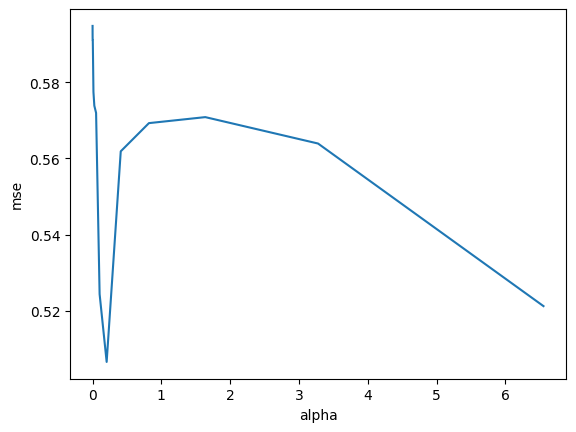

Time taken to train the model:  1.5395021438598633
Binary cross entropy: 15.105695574730266
Predicted mean: 0.5418085508891411 Actual mean: 0.5353764661369655
Accuracy: 0.5809055366376592


0.5809055366376592

In [34]:
#L1 regularization

def get_model(param):
    return ScratchLinearRegression(regularization='l1', alpha=param,classification=True)


def iterate_hyperparameters():
    #NOTE much lower allpha than in regression
    alpha = 0.0001
    while alpha < 10:
        yield alpha
        alpha *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='l1', alpha=best_param,classification=True)

accuracy_LC_L1_my= test_model(regressor, train, test, classification=True)


## L2

Trying hyperparameters: 0.001
Time taken to train the model:  2.6780083179473877
Binary cross entropy: 14.598162629141095
Predicted mean: 0.5510011035787482 Actual mean: 0.527825949865994
Accuracy: 0.5949865994009144
Value: 0.5949865994009144
Trying hyperparameters: 0.002
Time taken to train the model:  2.141244411468506
Binary cross entropy: 14.586797769172902
Predicted mean: 0.5506857953649693 Actual mean: 0.527825949865994
Accuracy: 0.5953019076146934
Value: 0.5953019076146934
Trying hyperparameters: 0.004
Time taken to train the model:  1.758847713470459
Binary cross entropy: 14.586797769172902
Predicted mean: 0.552892952861422 Actual mean: 0.527825949865994
Accuracy: 0.5953019076146934
Value: 0.5953019076146934
Trying hyperparameters: 0.008
Time taken to train the model:  1.7327992916107178
Binary cross entropy: 14.598162629141095
Predicted mean: 0.5506857953649693 Actual mean: 0.527825949865994
Accuracy: 0.5949865994009144
Value: 0.5949865994009144
Trying hyperparameters: 0.016
T

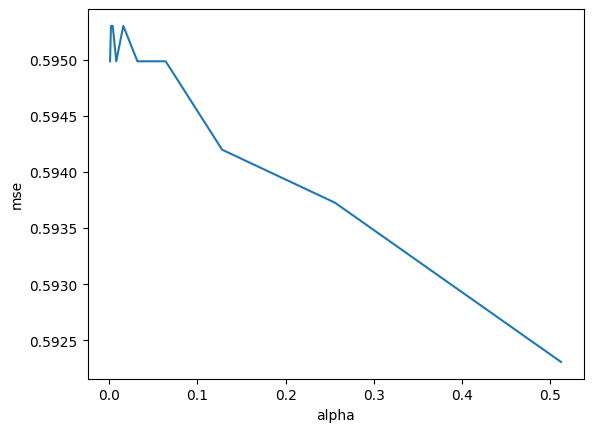

Time taken to train the model:  1.9208967685699463
Binary cross entropy: 15.082966571458027
Predicted mean: 0.5394122840206835 Actual mean: 0.5353764661369655
Accuracy: 0.5815361331819902


0.5815361331819902

In [36]:
#L2 regularization

def get_model(param):
    return ScratchLinearRegression(regularization='l2', alpha=param,classification=True)


def iterate_hyperparameters():
    # for alpha in range(1,1000,100): #giuliu dice esponenziale tra 0 e 1
    #     yield alpha
    alpha = 0.001
    while alpha < 1:
        yield alpha
        alpha *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='l2', alpha=best_param,classification=True)

accuracy_LC_L2_my=test_model(regressor, train, test, classification=True)

In [ ]:
#Elastic net regularization

def get_model(param):
    return ScratchLinearRegression(regularization='elasticnet', alpha=param)


def iterate_hyperparameters():
    # for alpha in range(1,1000,100): #giuliu dice esponenziale tra 0 e 1
    #     yield alpha

    l1 = 1
    while l1 < 200:
        l2 = 0.001
        while l2 < 0.5:
            yield l1 / (l1 + l2)
            l2 *= 2
        l1 *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=False)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='elasticnet', alpha=best_param)

test_model(regressor, train, test, classification=False)

Trying hyperparameters: 0.91
Time taken to train the model:  2.7852590084075928
Binary cross entropy: 15.939216105387608
Predicted mean: 0.5673971306952547 Actual mean: 0.527825949865994
Accuracy: 0.557780230174996
Value: 0.557780230174996
Trying hyperparameters: 0.92
Time taken to train the model:  1.9711158275604248
Binary cross entropy: 14.944790858170915
Predicted mean: 0.5930947501182405 Actual mean: 0.527825949865994
Accuracy: 0.5853696988806558
Value: 0.5853696988806558
Trying hyperparameters: 0.93
Time taken to train the model:  1.7620997428894043
Binary cross entropy: 15.85397965562618
Predicted mean: 0.5653476273056913 Actual mean: 0.527825949865994
Accuracy: 0.5601450417783383
Value: 0.5601450417783383
Trying hyperparameters: 0.9400000000000001
Time taken to train the model:  2.1351194381713867
Binary cross entropy: 15.4562095567395
Predicted mean: 0.5770140312155132 Actual mean: 0.527825949865994
Accuracy: 0.5711808292606022
Value: 0.5711808292606022
Trying hyperparameters:

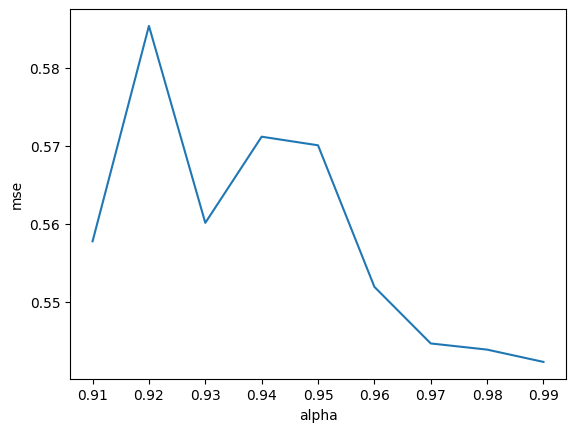

TypeError: unsupported operand type(s) for -: 'int' and 'list'

In [38]:
#Elastic net regularization

def get_model(param):
    return ScratchLinearRegression(regularization='elasticnet', alpha=param,classification=True)


def iterate_hyperparameters():
    # for alpha in range(1,1000,100): #giuliu dice esponenziale tra 0 e 1
    #     yield alpha

    for a in range(1, 10):
        yield 0.9 + a / 100


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='elasticnet', alpha=params,classification=True)

test_model(regressor, train, test, classification=True)

Trying hyperparameters: (0.01, 0.5)
Time taken to train the model:  2.0727579593658447
Binary cross entropy: 14.899331418298152
Predicted mean: 0.5489516001891849 Actual mean: 0.527825949865994
Accuracy: 0.5866309317357717
Value: 0.5866309317357717
Trying hyperparameters: (0.01, 0.6)
Time taken to train the model:  1.5396637916564941
Binary cross entropy: 14.916378708250436
Predicted mean: 0.5453255557307268 Actual mean: 0.527825949865994
Accuracy: 0.5861579694151032
Value: 0.5861579694151032
Trying hyperparameters: (0.01, 0.7)
Time taken to train the model:  2.1990439891815186
Binary cross entropy: 14.950473288155008
Predicted mean: 0.5456408639445057 Actual mean: 0.527825949865994
Accuracy: 0.5852120447737663
Value: 0.5852120447737663
Trying hyperparameters: (0.01, 0.8)
Time taken to train the model:  2.2234437465667725
Binary cross entropy: 15.018662447964154
Predicted mean: 0.5472174050134005 Actual mean: 0.527825949865994
Accuracy: 0.5833201954910926
Value: 0.5833201954910926
Tryi

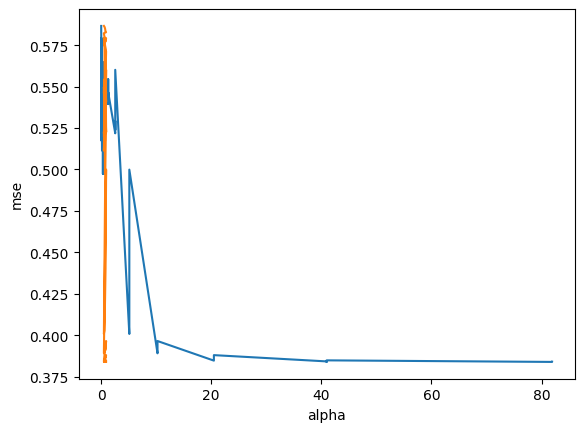

Time taken to train the model:  1.6133451461791992
Binary cross entropy: 15.387535215306034
Predicted mean: 0.5367637785344936 Actual mean: 0.5353764661369655
Accuracy: 0.5730861394879556


0.5730861394879556

In [39]:
#Elastic net regularization

def get_model(param):
    a, b = param
    return ScratchLinearRegression(regularization='elasticnetV2', alpha=a, l1_ratio=b,classification=True)


def iterate_hyperparameters():
    # for alpha in range(1,1000,100): #giuliu dice esponenziale tra 0 e 1
    #     yield alpha

    a = 0.01
    while a < 100:
        for b in range(5, 10):
            yield a, b / 10
        a *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'alpha', 'mse')
a, b = best_param
regressor = ScratchLinearRegression(regularization='elasticnetV2', alpha=a, l1_ratio=b,classification=True)

test_model(regressor, train, test, classification=True)

# Logistic Classifier

In [41]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression(max_iter=1000, penalty=None)
test_model(regressor, train, test, classification=True)

Time taken to train the model:  1.7899055480957031
Binary cross entropy: 12.673692224600657
Predicted mean: 0.5593391348215412 Actual mean: 0.5353764661369655
Accuracy: 0.6483793668810695


0.6483793668810695

In [42]:
regressor = SGDClassifier(max_iter=1000, penalty=None, learning_rate='constant', shuffle=False, eta0=0.00001,
                          early_stopping=False, loss='log_loss')
test_model(regressor, train, test, classification=True)


Time taken to train the model:  0.18259286880493164
Binary cross entropy: 12.86007005143302
Predicted mean: 0.5589607768949426 Actual mean: 0.5353764661369655
Accuracy: 0.6432084752175558


0.6432084752175558

Trying hyperparameters: 0.0001
Time taken to train the model:  1.8664917945861816
Binary cross entropy: 12.654771574580469
Predicted mean: 0.5815860003153082 Actual mean: 0.527825949865994
Accuracy: 0.6489043039571181
Value: 0.6489043039571181
Trying hyperparameters: 0.0002
Time taken to train the model:  1.8464951515197754
Binary cross entropy: 12.632041854644086
Predicted mean: 0.5812706921015293 Actual mean: 0.527825949865994
Accuracy: 0.649534920384676
Value: 0.649534920384676
Trying hyperparameters: 0.0004
Time taken to train the model:  2.0488290786743164
Binary cross entropy: 12.620676994675895
Predicted mean: 0.5812706921015293 Actual mean: 0.527825949865994
Accuracy: 0.649850228598455
Value: 0.649850228598455
Trying hyperparameters: 0.0008
Time taken to train the model:  1.7889113426208496
Binary cross entropy: 12.632041854644084
Predicted mean: 0.5819013085290872 Actual mean: 0.527825949865994
Accuracy: 0.649534920384676
Value: 0.649534920384676
Trying hyperparameters: 0.0016

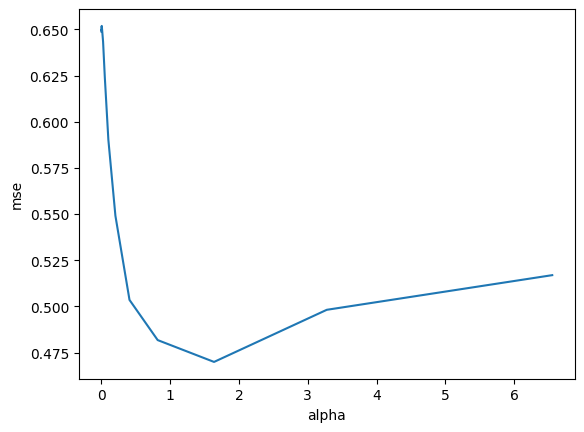

Time taken to train the model:  1.8615195751190186
Binary cross entropy: 12.773699838998509
Predicted mean: 0.573968974650019 Actual mean: 0.5353764661369655
Accuracy: 0.6456047420860134


0.6456047420860134

In [40]:
#L1 regularization

def get_model(param):
    return ScratchLinearRegression(regularization='l1', alpha=param,classification=True,logistic=True)


def iterate_hyperparameters():
    #NOTE much lower allpha than in regression
    alpha = 0.0001
    while alpha < 10:
        yield alpha
        alpha *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='l1', alpha=best_param,classification=True,logistic=True)

test_model(regressor, train, test, classification=True)

Trying hyperparameters: 0.001
Time taken to train the model:  2.3747479915618896
Binary cross entropy: 12.666136434548655
Predicted mean: 0.5806400756739714 Actual mean: 0.527825949865994
Accuracy: 0.6485889957433392
Value: 0.6485889957433392
Trying hyperparameters: 0.002
Time taken to train the model:  1.9306294918060303
Binary cross entropy: 12.654771574580467
Predicted mean: 0.5806400756739714 Actual mean: 0.527825949865994
Accuracy: 0.6489043039571181
Value: 0.6489043039571181
Trying hyperparameters: 0.004
Time taken to train the model:  2.056212902069092
Binary cross entropy: 12.654771574580467
Predicted mean: 0.5800094592464133 Actual mean: 0.527825949865994
Accuracy: 0.6489043039571181
Value: 0.6489043039571181
Trying hyperparameters: 0.008
Time taken to train the model:  2.138327121734619
Binary cross entropy: 12.62635942465999
Predicted mean: 0.5798518051395238 Actual mean: 0.527825949865994
Accuracy: 0.6496925744915655
Value: 0.6496925744915655
Trying hyperparameters: 0.016
T

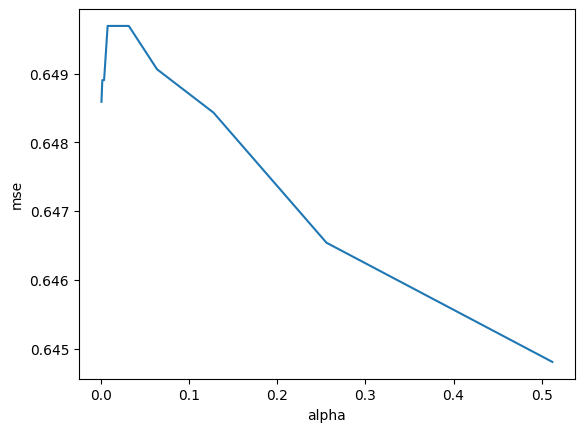

Time taken to train the model:  1.707129955291748
Binary cross entropy: 12.819157845542989
Predicted mean: 0.5641316685584563 Actual mean: 0.5353764661369655
Accuracy: 0.6443435489973515


0.6443435489973515

In [43]:
#L2 regularization

def get_model(param):
    return ScratchLinearRegression(regularization='l2', alpha=param,classification=True,logistic=True)


def iterate_hyperparameters():
    alpha = 0.001
    while alpha < 1:
        yield alpha
        alpha *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=True)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='l2', alpha=best_param,classification=True,logistic=True)

test_model(regressor, train, test, classification=True)